# **LIMPIEZA**

In [252]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv(r'data_sst_reto_coppel.csv')

In [ ]:
# the first column is the index
data = data.set_index(data.columns[0])

In [ ]:
data

,Fecha,Segmento,hora_llegada,hora_llamado,hora_salida,caja,tienda,status,estado
Unnamed: 0,,,,,,,,,
821243,2023-01-01,retail,0.503465,0.503477,0.503581,caja_a,Tienda_A,Atendido,Ciudad de México
821244,2023-01-01,retail,0.503581,0.503616,0.511174,caja_a,Tienda_A,Atendido,Ciudad de México
821245,2023-01-01,retail,0.503789,0.503801,0.505120,caja_b,Tienda_A,Atendido,Ciudad de México
821246,2023-01-01,retail,0.503847,0.505132,0.509333,caja_b,Tienda_A,Atendido,Ciudad de México
821247,2023-01-01,retail,0.503894,0.508072,0.509981,caja_c,Tienda_A,Atendido,Ciudad de México
...,...,...,...,...,...,...,...,...,...
18395866,2024-01-31,banco,0.905641,0.906602,0.907447,ventanilla_c,Tienda_B,Atendido,Quintana Roo
18395867,2024-01-31,banco,0.906521,0.907134,0.911394,ventanilla_a,Tienda_B,Atendido,Quintana Roo
18395868,2024-01-31,banco,0.907343,0.907481,0.913778,ventanilla_c,Tienda_B,Atendido,Quintana Roo


llegan y salen al otro dia

In [ ]:
# update only the rows where 'hora_llegada' > 'hora_llamado'
mask = data['hora_llegada'] > data['hora_llamado']
data.loc[mask, 'hora_llamado'] += 1
data.loc[mask, 'hora_salida'] += 1

# update only the rows where 'hora_llegada' > 'hora_llamado'
data.loc[data['hora_llegada'] > data['hora_llamado'], 'hora_llamado'] += 1

In [ ]:
# unique values of the third column
data[data.columns[1]].unique()

array(['retail', 'banco', 'afiliacion'], dtype=object)

In [ ]:
data[data.columns[5]].unique()

array(['caja_a', 'caja_b', 'caja_c', 'caja_d', 'caja_e', 'caja_f',
       'caja_j', 'caja_h', 'caja_i', 'caja_k', 'ventanilla_a',
       'ventanilla_b', 'caja_l', 'ventanilla_c', 'ventanilla_d', 'caja_m',
       'p_a', 'ventanilla_e', 'ventanilla_f', 'caja_n', 'p_b', 'p_c',
       'caja_o', 'p_d', 'p_e', 'caja_p', 'caja_q', 'p_f', 'p_g', 'p_h',
       'p_i', 'p_j', 'p_k', 'p_l', 'p_m', 'p_n', 'ventanilla_g', 'p_o',
       'p_p', 'a_a', 'a_b', 'p_q', 'p_r', 'p_s', 'caja_r', 'caja_s',
       'caja_t', 'caja_u', 'caja_v', 'Caja_a', 'ventanilla_h', 'p_t',
       'Caja_b', 'p_u', 'ventanilla_i', 'Caja_c', 'Caja_d', 'Caja_e',
       'p_v', 'p_y', 'ventanilla_j', 'Caja_f', 'ventanilla_k',
       'ventanilla_l', 'ventanilla_m', 'ventanilla_n', 'ventanilla_o',
       'ventanilla_p', 'ventanilla_q', 'p_z', 'P_a', 'P_b',
       'ventanilla_r', 'ventanilla_s', 'P_c', 'caja_x', 'P_d'],
      dtype=object)

In [ ]:
len(data[data.columns[5]].unique())

77

In [ ]:
data[data.columns[6]].unique()

array(['Tienda_A', 'Tienda_B', 'Tienda_C', 'Tienda_D', 'Tienda_E',
       'Tienda_F', 'Tienda_G', 'Tienda_H', 'Tienda_I', 'Tienda_J',
       'Tienda_K', 'Tienda_L', 'Tienda_M', 'Tienda_N', 'Tienda_O',
       'Tienda_P', 'Tienda_Q', 'Tienda_R', 'Tienda_S', 'Tienda_T',
       'Tienda_U', 'Tienda_V', 'Tienda_X', 'Tienda_Y', 'Tienda_Z',
       'Tienda_AA', 'Tienda_AB', 'Tienda_AC', 'Tienda_AD', 'Tienda_AE',
       'Tienda_AF', 'Tienda_AG', 'Tienda_AH', 'Tienda_AI', 'Tienda_AJ',
       'Tienda_AK', 'Tienda_AL', 'Tienda_AM', 'Tienda_AN', 'Tienda_AO',
       'Tienda_AP', 'Tienda_AQ', 'Tienda_AX', 'Tienda_AY', 'Tienda_AZ',
       'Tienda_BA', 'Tienda_BB', 'Tienda_BC', 'Tienda_BD', 'Tienda_BE'],
      dtype=object)

In [ ]:
len(data[data.columns[6]].unique())

50

In [ ]:
data[data.columns[7]].unique()

array(['Atendido', 'Ausente'], dtype=object)

In [ ]:
# create a new column with the difference between 'hora_llegada' and 'hora_salida'
data['duracion'] = data['hora_salida'] - data['hora_llegada']

In [ ]:
data['espera'] = data['hora_llamado'] - data['hora_llegada']

In [ ]:
data

,Fecha,Segmento,hora_llegada,hora_llamado,hora_salida,caja,tienda,status,estado,duracion,espera
Unnamed: 0,,,,,,,,,,,
821243,2023-01-01,retail,0.503465,0.503477,0.503581,caja_a,Tienda_A,Atendido,Ciudad de México,0.000116,0.000012
821244,2023-01-01,retail,0.503581,0.503616,0.511174,caja_a,Tienda_A,Atendido,Ciudad de México,0.007593,0.000035
821245,2023-01-01,retail,0.503789,0.503801,0.505120,caja_b,Tienda_A,Atendido,Ciudad de México,0.001331,0.000012
821246,2023-01-01,retail,0.503847,0.505132,0.509333,caja_b,Tienda_A,Atendido,Ciudad de México,0.005486,0.001285
821247,2023-01-01,retail,0.503894,0.508072,0.509981,caja_c,Tienda_A,Atendido,Ciudad de México,0.006088,0.004178
...,...,...,...,...,...,...,...,...,...,...,...
18395866,2024-01-31,banco,0.905641,0.906602,0.907447,ventanilla_c,Tienda_B,Atendido,Quintana Roo,0.001806,0.000961
18395867,2024-01-31,banco,0.906521,0.907134,0.911394,ventanilla_a,Tienda_B,Atendido,Quintana Roo,0.004873,0.000613
18395868,2024-01-31,banco,0.907343,0.907481,0.913778,ventanilla_c,Tienda_B,Atendido,Quintana Roo,0.006435,0.000139


In [ ]:
# show the duracion == 0
data[data['duracion'] == 0] # ?

,Fecha,Segmento,hora_llegada,hora_llamado,hora_salida,caja,tienda,status,estado,duracion,espera
Unnamed: 0,,,,,,,,,,,
157109,2023-01-05,banco,0.656984,0.656984,0.656984,ventanilla_a,Tienda_V,Atendido,Querétaro,0.0,0.0
2948020,2023-03-06,banco,0.594206,0.594206,0.594206,ventanilla_a,Tienda_B,Atendido,Quintana Roo,0.0,0.0
3653100,2023-04-10,retail,0.437296,0.437296,0.437296,caja_j,Tienda_O,Atendido,Chihuahua,0.0,0.0
4548258,2023-04-19,banco,0.756104,0.756104,0.756104,caja_m,Tienda_AN,Atendido,Veracruz de Ignacio de la Llave,0.0,0.0
5212774,2023-05-14,banco,0.446104,0.446104,0.446104,caja_q,Tienda_AF,Atendido,Nuevo León,0.0,0.0
10157802,2023-08-09,banco,0.435479,0.435479,0.435479,ventanilla_d,Tienda_BE,Atendido,Guerrero,0.0,0.0
15820064,2023-11-22,banco,0.754738,0.754738,0.754738,ventanilla_c,Tienda_AX,Atendido,México,0.0,0.0


In [ ]:
data = data.drop(data[data['duracion'] <= 0].index)
data = data.drop(data[data['espera'] <= 0].index)

# **COMPARACION DE LA TIENDA AL Y C**

porque una es muy mala y otra es muy buena. queremos saber por que

In [ ]:
# get the values that duracion is greater than 0.2
data[data['duracion'] > 0.16]

,Fecha,Segmento,hora_llegada,hora_llamado,hora_salida,caja,tienda,status,estado,duracion,espera
Unnamed: 0,,,,,,,,,,,
380986,2023-01-02,retail,0.385039,0.399692,0.577088,caja_e,Tienda_K,Atendido,Tabasco,0.192049,0.014653
51140,2023-01-02,banco,0.435537,0.435560,0.975329,ventanilla_a,Tienda_D,Atendido,Sinaloa,0.539792,0.000023
714635,2023-01-02,banco,0.442736,0.444079,0.720306,ventanilla_a,Tienda_AA,Atendido,Ciudad de México,0.277569,0.001343
51141,2023-01-02,retail,0.445931,0.445988,0.975329,caja_a,Tienda_D,Atendido,Sinaloa,0.529398,0.000058
51146,2023-01-02,retail,0.450306,0.451359,0.975329,caja_h,Tienda_D,Atendido,Sinaloa,0.525023,0.001053
...,...,...,...,...,...,...,...,...,...,...,...
17580417,2024-01-31,afiliacion,0.628106,0.647840,0.959715,p_b,Tienda_AZ,Atendido,Sonora,0.331609,0.019734
17580545,2024-01-31,afiliacion,0.681243,0.742933,0.959715,p_e,Tienda_AZ,Atendido,Sonora,0.278472,0.061690
17550862,2024-01-31,retail,0.721417,0.724218,0.959623,caja_j,Tienda_D,Atendido,Sinaloa,0.238206,0.002801


In [ ]:
# get the values of the tienda Tienda_V
al = data[data[data.columns[6]] == 'Tienda_AL']
al

,Fecha,Segmento,hora_llegada,hora_llamado,hora_salida,caja,tienda,status,estado,duracion,espera
Unnamed: 0,,,,,,,,,,,
689124,2023-01-11,retail,0.397493,0.587910,0.588106,caja_n,Tienda_AL,Atendido,Chiapas,0.190613,0.190417
689125,2023-01-11,afiliacion,0.440502,0.589044,0.589252,p_e,Tienda_AL,Atendido,Chiapas,0.148750,0.148542
689126,2023-01-11,afiliacion,0.440653,0.695178,0.696683,p_e,Tienda_AL,Atendido,Chiapas,0.256030,0.254525
689127,2023-01-11,afiliacion,0.441069,0.733187,0.733569,p_d,Tienda_AL,Atendido,Chiapas,0.292500,0.292118
689130,2023-01-11,retail,0.449831,0.588141,0.588315,caja_n,Tienda_AL,Atendido,Chiapas,0.138484,0.138310
...,...,...,...,...,...,...,...,...,...,...,...
18502723,2024-01-31,retail,0.796995,0.801104,0.803002,caja_f,Tienda_AL,Atendido,Chiapas,0.006007,0.004109
18502724,2024-01-31,retail,0.797308,0.801197,0.803465,caja_k,Tienda_AL,Atendido,Chiapas,0.006157,0.003889
18502725,2024-01-31,retail,0.797852,0.803037,0.804391,caja_f,Tienda_AL,Atendido,Chiapas,0.006539,0.005185


In [ ]:
# show the day 2023-06-08
al[al[data.columns[0]] == '2023-06-08'].head(50)

,Fecha,hora_llegada,hora_llamado,hora_salida,duracion,espera
Unnamed: 0,,,,,,
7528085,2023-06-08,0.382840,0.398789,0.402146,0.019306,0.015949
7528086,2023-06-08,0.383176,0.399322,0.399773,0.016597,0.016146
7528087,2023-06-08,0.383222,0.399808,0.401116,0.017894,0.016586
7528088,2023-06-08,0.383257,0.401150,0.401752,0.018495,0.017894
7528089,2023-06-08,0.383303,0.401787,0.402412,0.019109,0.018484
7528090,2023-06-08,0.383373,0.402192,0.407065,0.023692,0.018819
7528091,2023-06-08,0.383477,0.402447,0.406486,0.023009,0.018970
7528092,2023-06-08,0.383523,0.403292,0.433905,0.050382,0.019769
7528093,2023-06-08,0.383558,0.406521,0.408477,0.024919,0.022963


## **PARAMETRIC F**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set(style="whitegrid")

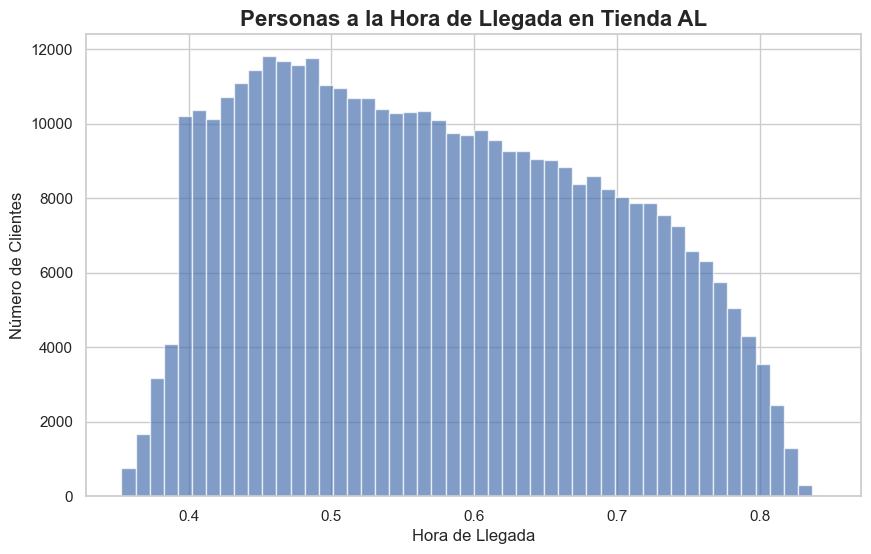

In [209]:
plt.figure(figsize=(10,6))
plt.hist(al['hora_llegada'], bins=50, edgecolor='w', alpha=0.7)
plt.xlabel('Hora de Llegada')
plt.ylabel('Número de Clientes')
plt.title('Personas a la Hora de Llegada en Tienda AL', fontsize=16, fontweight='bold')
plt.savefig('99-histograma_tienda_al.svg', format='svg', bbox_inches='tight')
plt.show()

In [206]:
from scipy.stats import beta

a, b, loc, scale = beta.fit(al['hora_llegada'])

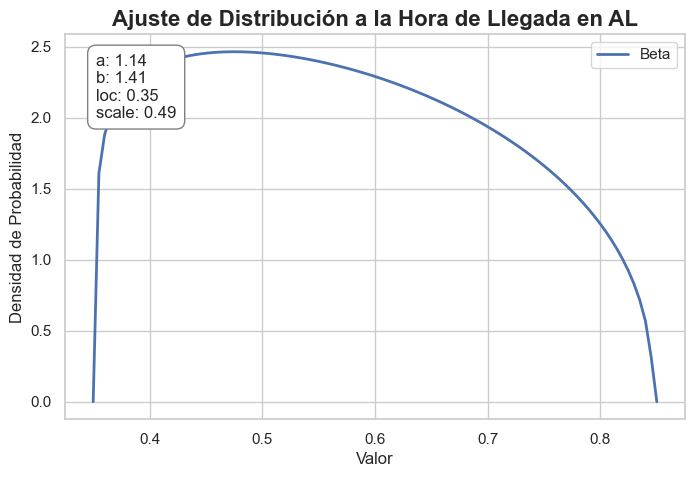

In [210]:
x = np.linspace(0.35, 0.85, 100)
pdf = beta.pdf(x, a, b, loc=loc, scale=scale)
plt.figure(figsize=(8, 5))
plt.plot(x, pdf, 'b-', lw=2, label='Beta')
plt.xlabel("Valor")
plt.ylabel("Densidad de Probabilidad")
plt.title("Ajuste de Distribución a la Hora de Llegada en AL", fontsize=16, fontweight='bold')

# Anotar parámetros en el gráfico
param_text = f"a: {a:.2f}\nb: {b:.2f}\nloc: {loc:.2f}\nscale: {scale:.2f}"
plt.text(0.05, 0.95, param_text, transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top',
         bbox=dict(boxstyle="round,pad=0.5", facecolor="white", edgecolor="gray"))

plt.legend()
plt.savefig('99-ajuste_tienda_al.svg', format='svg', bbox_inches='tight')
plt.show()

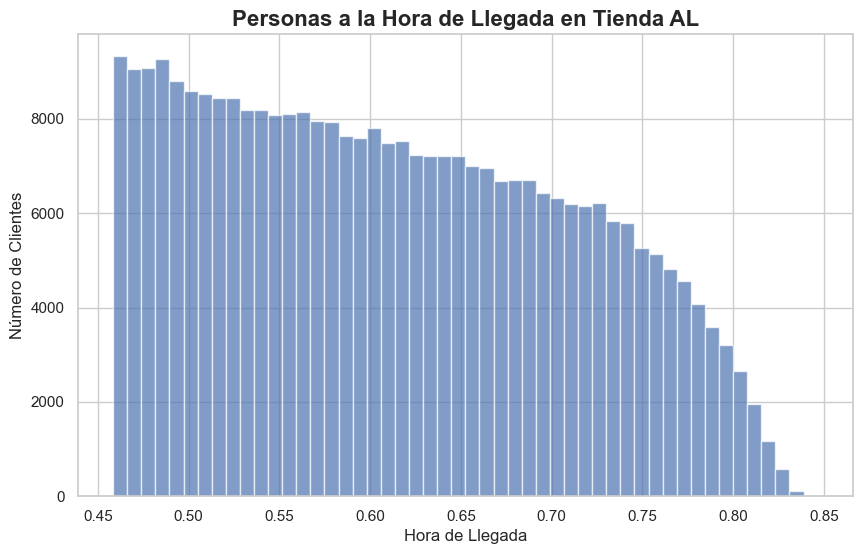

In [211]:
masa04 = al[al['hora_llegada'] > 11/24] # it opens at 11:00 am


plt.figure(figsize=(10,6))
plt.hist(masa04['hora_llegada'], bins=50, edgecolor='w', alpha=0.7)
plt.xlabel('Hora de Llegada')
plt.ylabel('Número de Clientes')
plt.title('Personas a la Hora de Llegada en Tienda AL', fontsize=16, fontweight='bold')
plt.savefig('99-histograma_tienda_al_11_adelante.svg', format='svg', bbox_inches='tight')
plt.show()

In [212]:
from scipy.stats import beta

a, b, loc, scale = beta.fit(masa04['hora_llegada'])

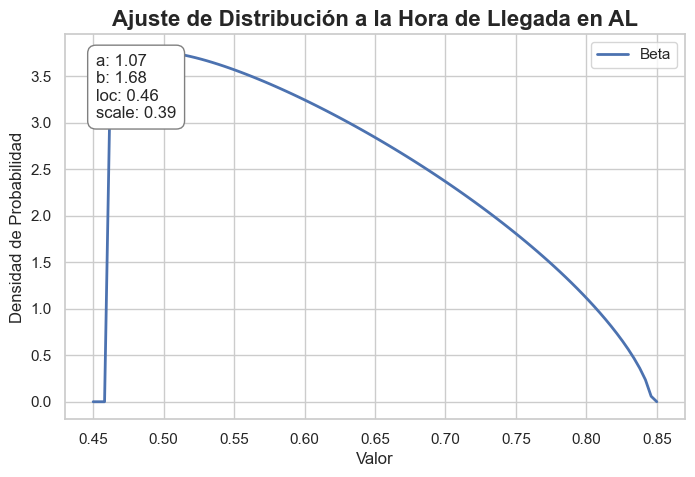

In [213]:
x = np.linspace(0.45, 0.85, 100)
pdf = beta.pdf(x, a, b, loc=loc, scale=scale)
plt.figure(figsize=(8, 5))
plt.plot(x, pdf, 'b-', lw=2, label='Beta')
plt.xlabel("Valor")
plt.ylabel("Densidad de Probabilidad")
plt.title("Ajuste de Distribución a la Hora de Llegada en AL", fontsize=16, fontweight='bold')

# Annotate parameters on the plot
param_text = f"a: {a:.2f}\nb: {b:.2f}\nloc: {loc:.2f}\nscale: {scale:.2f}"
plt.text(0.05, 0.95, param_text, transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top',
         bbox=dict(boxstyle="round,pad=0.5", facecolor="white", edgecolor="gray"))

plt.legend()
plt.savefig('99-ajuste_tienda_al_11_adelante.svg', format='svg', bbox_inches='tight')
plt.show()

In [ ]:
al.head(50)

,Fecha,hora_llegada,hora_llamado,hora_salida,duracion,espera
Unnamed: 0,,,,,,
689124,2023-01-11,0.397493,0.587910,0.588106,0.190613,0.190417
689125,2023-01-11,0.440502,0.589044,0.589252,0.148750,0.148542
689126,2023-01-11,0.440653,0.695178,0.696683,0.256030,0.254525
689127,2023-01-11,0.441069,0.733187,0.733569,0.292500,0.292118
689130,2023-01-11,0.449831,0.588141,0.588315,0.138484,0.138310
689131,2023-01-11,0.479808,0.679414,0.681926,0.202118,0.199606
689133,2023-01-11,0.480630,0.681972,0.682227,0.201597,0.201343
689135,2023-01-11,0.480676,0.682262,0.682447,0.201771,0.201586
689136,2023-01-11,0.480734,0.682481,0.683488,0.202755,0.201748


In [ ]:
# drop the cols Segmento, caja, tienda, status
al = al.drop(columns=[data.columns[1], data.columns[5], data.columns[6], data.columns[7], data.columns[8]])

In [ ]:
# how many customers per day
customers_al = al.groupby(data.columns[0]).size()

In [ ]:
# group tienda by fecha. change the variables to their mean values
al_group = al.groupby(al.columns[0]).mean()

In [ ]:
al_group

,hora_llegada,hora_llamado,hora_salida,duracion,espera
Fecha,,,,,
2023-01-11,0.623065,0.755945,0.757217,0.134152,0.132879
2023-01-12,0.593485,0.604565,0.607614,0.014128,0.011080
2023-01-13,0.593620,0.605578,0.608137,0.014517,0.011957
2023-01-14,0.594959,0.614528,0.617029,0.022070,0.019569
2023-01-15,0.563549,0.574346,0.577026,0.013477,0.010797
...,...,...,...,...,...
2024-01-27,0.579264,0.591562,0.594893,0.015628,0.012298
2024-01-28,0.541464,0.550605,0.554233,0.012768,0.009141
2024-01-29,0.576367,0.592566,0.595920,0.019553,0.016199


In [ ]:
al_group['Personas'] = customers_al

In [ ]:
al_group

,hora_llegada,hora_llamado,hora_salida,duracion,espera,Personas
Fecha,,,,,,
2023-01-11,0.623065,0.755945,0.757217,0.134152,0.132879,73
2023-01-12,0.593485,0.604565,0.607614,0.014128,0.011080,1141
2023-01-13,0.593620,0.605578,0.608137,0.014517,0.011957,1447
2023-01-14,0.594959,0.614528,0.617029,0.022070,0.019569,1348
2023-01-15,0.563549,0.574346,0.577026,0.013477,0.010797,1263
...,...,...,...,...,...,...
2024-01-27,0.579264,0.591562,0.594893,0.015628,0.012298,872
2024-01-28,0.541464,0.550605,0.554233,0.012768,0.009141,598
2024-01-29,0.576367,0.592566,0.595920,0.019553,0.016199,1110


In [ ]:
# get the values of the tienda Tienda_C
c = data[data[data.columns[6]] == 'Tienda_C']
# drop the cols Segmento, caja, tienda, status
c = c.drop(columns=[data.columns[1], data.columns[5], data.columns[6], data.columns[7], data.columns[8]])
# how many customers per day
customers_c = c.groupby(data.columns[0]).size()
# group tienda by fecha. change the variables to their mean values
c_group = c.groupby(c.columns[0]).mean()
c_group['Personas'] = customers_c
c_group

,hora_llegada,hora_llamado,hora_salida,duracion,espera,Personas
Fecha,,,,,,
2023-01-02,0.537083,0.540053,0.543226,0.006143,0.002969,560
2023-01-03,0.521680,0.523322,0.527094,0.005414,0.001642,575
2023-01-04,0.526450,0.536174,0.539677,0.013227,0.009723,568
2023-01-05,0.513904,0.517140,0.525745,0.011841,0.003235,307
2023-01-06,0.511626,0.522100,0.525124,0.013498,0.010474,598
...,...,...,...,...,...,...
2024-01-27,0.543544,0.546571,0.550330,0.006786,0.003026,449
2024-01-28,0.491994,0.496276,0.499329,0.007335,0.004282,339
2024-01-29,0.508749,0.515266,0.518098,0.009349,0.006517,547


# Plots to compare AL and C

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [ ]:
# multiindex
tiendas = pd.concat([al_group, c_group], axis=1, keys=['AL', 'C'])

In [ ]:
# know the days of NaN values
tiendas[tiendas.isna().any(axis=1)]

AL                                                        \
           hora_llegada hora_llamado hora_salida  duracion    espera Personas   
Fecha                                                                           
2023-07-21     0.584846     0.606014    0.609220  0.024374  0.021167   1157.0   
2023-09-27     0.574888     0.602624    0.605601  0.030713  0.027735    891.0   
2023-09-28     0.571823     0.597886    0.601426  0.029604  0.026064    868.0   
2023-01-02          NaN          NaN         NaN       NaN       NaN      NaN   
2023-01-03          NaN          NaN         NaN       NaN       NaN      NaN   
2023-01-04          NaN          NaN         NaN       NaN       NaN      NaN   
2023-01-05          NaN          NaN         NaN       NaN       NaN      NaN   
2023-01-06          NaN          NaN         NaN       NaN       NaN      NaN   
2023-01-07          NaN          NaN         NaN       NaN       NaN      NaN   
2023-01-08          NaN          NaN         NaN       NaN       NaN      NaN   
2023-01-09          NaN          NaN         NaN       NaN       NaN      NaN   
2023-01-10          NaN          NaN         NaN       NaN       NaN      NaN   

                      C                                                        
           hora_llegada hora_llamado hora_salida  duracion    espera Personas  
Fecha                                                                          
2023-07-21          NaN          NaN         NaN       NaN       NaN      NaN  
2023-09-27          NaN          NaN         NaN       NaN       NaN      NaN  
2023-09-28          NaN          NaN         NaN       NaN       NaN      NaN  
2023-01-02     0.537083     0.540053    0.543226  0.006143  0.002969    560.0  
2023-01-03     0.521680     0.523322    0.527094  0.005414  0.001642    575.0  
2023-01-04     0.526450     0.536174    0.539677  0.013227  0.009723    568.0  
2023-01-05     0.513904     0.517140    0.525745  0.011841  0.003235    307.0  
2023-01-06     0.511626     0.522100    0.525124  0.013498  0.010474    598.0  
2023-01-07     0.530042     0.534264    0.537302  0.007260  0.004222    361.0  
2023-01-08     0.483233     0.484096    0.492964  0.009731  0.000863    199.0  
2023-01-09     0.508015     0.511270    0.514458  0.006443  0.003256    486.0  
2023-01-10     0.409786     0.425961    0.433311  0.023525  0.016175    118.0

In [ ]:
# drop the NaN rows
tiendas = tiendas.dropna()

In [ ]:
tiendas

AL                                                        \
           hora_llegada hora_llamado hora_salida  duracion    espera Personas   
Fecha                                                                           
2023-01-11     0.623065     0.755945    0.757217  0.134152  0.132879     73.0   
2023-01-12     0.593485     0.604565    0.607614  0.014128  0.011080   1141.0   
2023-01-13     0.593620     0.605578    0.608137  0.014517  0.011957   1447.0   
2023-01-14     0.594959     0.614528    0.617029  0.022070  0.019569   1348.0   
2023-01-15     0.563549     0.574346    0.577026  0.013477  0.010797   1263.0   
...                 ...          ...         ...       ...       ...      ...   
2024-01-27     0.579264     0.591562    0.594893  0.015628  0.012298    872.0   
2024-01-28     0.541464     0.550605    0.554233  0.012768  0.009141    598.0   
2024-01-29     0.576367     0.592566    0.595920  0.019553  0.016199   1110.0   
2024-01-30     0.579505     0.593971    0.597561  0.018056  0.014466    994.0   
2024-01-31     0.582350     0.595784    0.599070  0.016720  0.013434    888.0   

                      C                                                        
           hora_llegada hora_llamado hora_salida  duracion    espera Personas  
Fecha                                                                          
2023-01-11     0.505384     0.565065    0.569863  0.064479  0.059681    139.0  
2023-01-12     0.546037     0.554373    0.558941  0.012905  0.008336    265.0  
2023-01-13     0.535689     0.551486    0.554632  0.018943  0.015797    444.0  
2023-01-14     0.560454     0.564526    0.567629  0.007175  0.004072    540.0  
2023-01-15     0.489104     0.490598    0.492817  0.003713  0.001494    344.0  
...                 ...          ...         ...       ...       ...      ...  
2024-01-27     0.543544     0.546571    0.550330  0.006786  0.003026    449.0  
2024-01-28     0.491994     0.496276    0.499329  0.007335  0.004282    339.0  
2024-01-29     0.508749     0.515266    0.518098  0.009349  0.006517    547.0  
2024-01-30     0.528230     0.530972    0.534654  0.006424  0.002742    414.0  
2024-01-31     0.512936     0.516508    0.519453  0.006517  0.003572    474.0  

[381 rows x 12 columns]

In [ ]:
gt = 'Tienda AL'    # good tienda
bt = 'Tienda C'    # bad tienda

In [ ]:
gn = 'AL'    # good tienda name
bn = 'C'    # bad tienda name

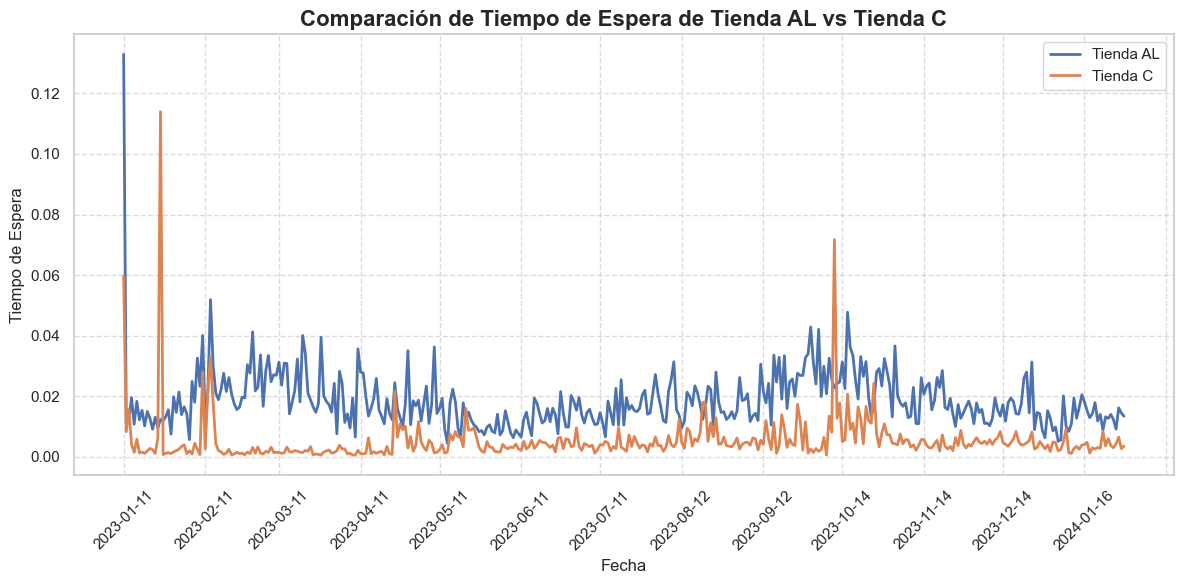

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(tiendas.index, tiendas[(gn, 'espera')], label=gt, linewidth=2)
plt.plot(tiendas.index, tiendas[(bn, 'espera')], label=bt, linewidth=2)
plt.xlabel('Fecha')
plt.ylabel('Tiempo de Espera')
plt.title(f'Comparación de Tiempo de Espera de {gt} vs {bt}', fontsize=16, fontweight='bold')

# use month locator to reduce clutter on the x-axis
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('99-comparacion_tiendas_espera.svg', format='svg', bbox_inches='tight')
plt.show()

In [248]:
sns.color_palette("Paired")

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

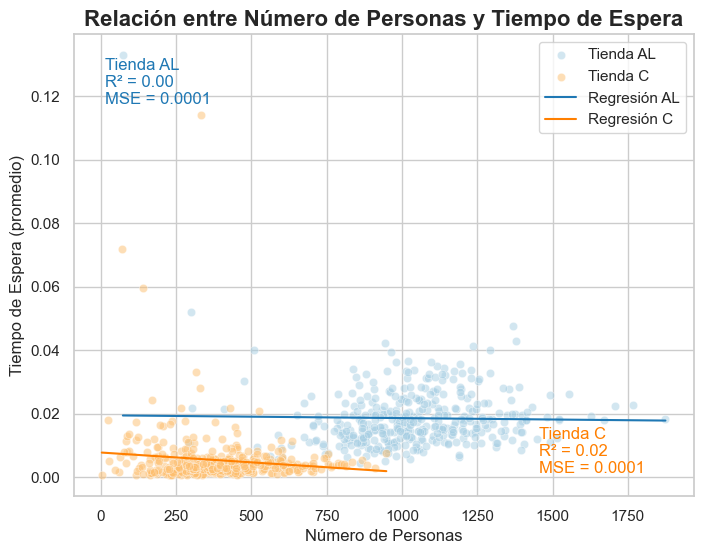

In [253]:
from sklearn.metrics import r2_score, mean_squared_error

plt.figure(figsize=(8, 6))
pal = sns.color_palette("Paired", 10)

# Scatter plots with palette colors
sns.scatterplot(x=tiendas[('AL', 'Personas')], y=tiendas[('AL', 'espera')], 
                label='Tienda AL', alpha=0.5, color=pal[0])
sns.scatterplot(x=tiendas[('C', 'Personas')], y=tiendas[('C', 'espera')], 
                label='Tienda C', alpha=0.5, color=pal[6])

# Regression line for Tienda AL
x_al = tiendas[('AL', 'Personas')]
y_al = tiendas[('AL', 'espera')]
coef_al = np.polyfit(x_al, y_al, 1)
poly_al = np.poly1d(coef_al)
x_al_sorted = np.sort(x_al)
plt.plot(x_al_sorted, poly_al(x_al_sorted), color=pal[1], label='Regresión AL')

# Regression line for Tienda C
x_c = tiendas[('C', 'Personas')]
y_c = tiendas[('C', 'espera')]
coef_c = np.polyfit(x_c, y_c, 1)
poly_c = np.poly1d(coef_c)
x_c_sorted = np.sort(x_c)
plt.plot(x_c_sorted, poly_c(x_c_sorted), color=pal[7], label='Regresión C')

# Compute metrics for Tienda AL
r2_al = r2_score(y_al, poly_al(x_al))
mse_al = mean_squared_error(y_al, poly_al(x_al))

# Compute metrics for Tienda C
r2_c = r2_score(y_c, poly_c(x_c))
mse_c = mean_squared_error(y_c, poly_c(x_c))

# Annotate the metrics on the plot
plt.text(0.05, 0.95, f"Tienda AL\nR² = {r2_al:.2f}\nMSE = {mse_al:.4f}", 
         transform=plt.gca().transAxes, color=pal[1], verticalalignment='top')
plt.text(0.75, 0.05, f"Tienda C\nR² = {r2_c:.2f}\nMSE = {mse_c:.4f}", 
         transform=plt.gca().transAxes, color=pal[7])

plt.title('Relación entre Número de Personas y Tiempo de Espera', fontsize=16, fontweight='bold')
plt.xlabel('Número de Personas')
plt.ylabel('Tiempo de Espera (promedio)')
plt.legend()
plt.savefig('98-relacion_personas_espera.svg', format='svg', bbox_inches='tight')
plt.show()


## **SERIES**

In [218]:
from statsmodels.tsa.stattools import adfuller

In [223]:
# adfuller test for stationarity for tienda AL
adfuller(tiendas[(gn, 'espera')])  

(-2.246164668673859,
 0.18991878172781218,
 13,
 367,
 {'1%': -3.448294490928673,
  '5%': -2.869447722240253,
  '10%': -2.570982681065269},
 -2618.721306811049)

In [224]:
# no es estacionaria, hacemos la diferencia
nablatiendas = tiendas.diff().dropna()
nablatiendas

AL                                                        \
           hora_llegada hora_llamado hora_salida  duracion    espera Personas   
Fecha                                                                           
2023-01-12    -0.029580    -0.151380   -0.149603 -0.120023 -0.121800   1068.0   
2023-01-13     0.000135     0.001013    0.000524  0.000389  0.000878    306.0   
2023-01-14     0.001338     0.008950    0.008891  0.007553  0.007612    -99.0   
2023-01-15    -0.031409    -0.040182   -0.040002 -0.008593 -0.008772    -85.0   
2023-01-16     0.034368     0.041916    0.041805  0.007437  0.007547    612.0   
...                 ...          ...         ...       ...       ...      ...   
2024-01-27    -0.004743    -0.006445   -0.006616 -0.001873 -0.001702    -62.0   
2024-01-28    -0.037800    -0.040957   -0.040660 -0.002860 -0.003157   -274.0   
2024-01-29     0.034902     0.041961    0.041687  0.006785  0.007058    512.0   
2024-01-30     0.003138     0.001405    0.001641 -0.001497 -0.001733   -116.0   
2024-01-31     0.002845     0.001813    0.001509 -0.001336 -0.001032   -106.0   

                      C                                                        
           hora_llegada hora_llamado hora_salida  duracion    espera Personas  
Fecha                                                                          
2023-01-12     0.040652    -0.010692   -0.010922 -0.051575 -0.051345    126.0  
2023-01-13    -0.010348    -0.002887   -0.004310  0.006038  0.007461    179.0  
2023-01-14     0.024765     0.013040    0.012998 -0.011767 -0.011725     96.0  
2023-01-15    -0.071350    -0.073928   -0.074812 -0.003462 -0.002578   -196.0  
2023-01-16     0.035476     0.039857    0.040513  0.005037  0.004381    404.0  
...                 ...          ...         ...       ...       ...      ...  
2024-01-27     0.011558     0.010875    0.009748 -0.001810 -0.000683     52.0  
2024-01-28    -0.051551    -0.050295   -0.051001  0.000549  0.001256   -110.0  
2024-01-29     0.016755     0.018990    0.018769  0.002014  0.002235    208.0  
2024-01-30     0.019482     0.015707    0.016556 -0.002925 -0.003775   -133.0  
2024-01-31    -0.015294    -0.014464   -0.015201  0.000094  0.000830     60.0  

[380 rows x 12 columns]

In [226]:
gn

'AL'

In [227]:
# adfuller test for stationarity for tienda AL
print('ADFULLER para AL, espera')
print(adfuller(nablatiendas[(gn, 'espera')]))

print('\nADFULLER para AL, personas')
print(adfuller(nablatiendas[(gn, 'Personas')]))

print('\nADFULLER para C, espera')
print(adfuller(nablatiendas[(bn, 'espera')]))

print('\nADFULLER para C, personas')
print(adfuller(nablatiendas[(bn, 'Personas')]))

ADFULLER para AL, espera
(-8.396237317709081, 2.2950256823983924e-13, 12, 367, {'1%': -3.448294490928673, '5%': -2.869447722240253, '10%': -2.570982681065269}, -2608.3521746754973)

ADFULLER para AL, personas
(-8.494454780893117, 1.2871046518098877e-13, 13, 366, {'1%': -3.448343869853195, '5%': -2.869469418606909, '10%': -2.570994248260623}, 4822.616210017121)

ADFULLER para C, espera
(-9.489950574552134, 3.6755254583581914e-16, 17, 362, {'1%': -3.448544133483233, '5%': -2.8695574079525565, '10%': -2.5710411593052713}, -2790.0360358140492)

ADFULLER para C, personas
(-9.052602258864, 4.794883419819398e-15, 13, 366, {'1%': -3.448343869853195, '5%': -2.869469418606909, '10%': -2.570994248260623}, 4601.775478160001)


todas son estacionarias

In [ ]:
# create an ARIMA model
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
import numpy as np

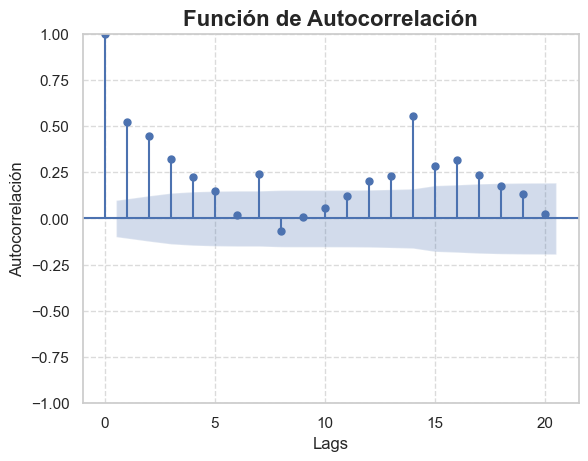

In [ ]:
# plot the ACF and PACF
fig = plot_acf(arrivals['count'], lags=20, title='Función de Autocorrelación')
plt.xlabel('Lags')
plt.ylabel('Autocorrelación')
plt.title('Función de Autocorrelación', fontsize=16, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig("acf.svg", format='svg', bbox_inches='tight')
plt.show()

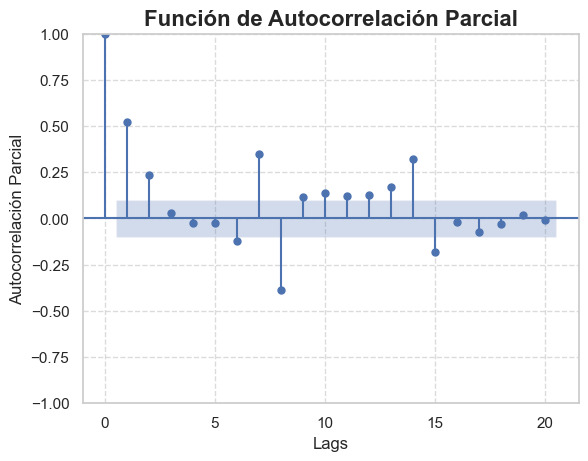

In [ ]:
fig = plot_pacf(arrivals['count'], lags=20, title='Función de Autocorrelación Parcial')
plt.xlabel('Lags') 
plt.ylabel('Autocorrelación Parcial')
plt.title('Función de Autocorrelación Parcial', fontsize=16, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig("pacf.svg", format='svg', bbox_inches='tight')
plt.show()

In [ ]:
# get the ACF and PACF values that are significantly different from 0
acf_values = acf(arrivals['count'], nlags=20)
pacf_values = pacf(arrivals['count'], nlags=20)

In [ ]:
# get the lags that are significantly different from 0
significant_acf_lags = np.where(np.abs(acf_values) > 0.2)[0]
significant_pacf_lags = np.where(np.abs(pacf_values) > 0.2)[0]
print("ACF Lags:", significant_acf_lags)
print("PACF Lags:", significant_pacf_lags)

ACF Lags: [ 0  1  2  3  4  7 12 13 14 15 16 17]
PACF Lags: [ 0  1  2  7  8 14]


In [ ]:
# ARIMA model 14, 0, 17
model = ARIMA(arrivals['count'], order=(14, 0, 17))
model_fit = model.fit()
print(model_fit.summary())

c:\Users\herie\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\herie\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\herie\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\herie\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary startin

                               SARIMAX Results                                
Dep. Variable:                  count   No. Observations:                  393
Model:               ARIMA(14, 0, 17)   Log Likelihood               -3988.795
Date:                Fri, 28 Mar 2025   AIC                           8043.590
Time:                        20:47:37   BIC                           8174.726
Sample:                             0   HQIC                          8095.558
                                - 393                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.612e+04   2.01e+04      2.295      0.022    6730.042    8.55e+04
ar.L1          0.2212      0.168      1.316      0.188      -0.108       0.551
ar.L2         -0.0095      0.145     -0.066      0.9

In [ ]:
data

,Fecha,Segmento,hora_llegada,hora_llamado,hora_salida,caja,tienda,status,estado,duracion,espera
Unnamed: 0,,,,,,,,,,,
821243,2023-01-01,retail,0.503465,0.503477,0.503581,caja_a,Tienda_A,Atendido,Ciudad de México,0.000116,0.000012
821244,2023-01-01,retail,0.503581,0.503616,0.511174,caja_a,Tienda_A,Atendido,Ciudad de México,0.007593,0.000035
821245,2023-01-01,retail,0.503789,0.503801,0.505120,caja_b,Tienda_A,Atendido,Ciudad de México,0.001331,0.000012
821246,2023-01-01,retail,0.503847,0.505132,0.509333,caja_b,Tienda_A,Atendido,Ciudad de México,0.005486,0.001285
821247,2023-01-01,retail,0.503894,0.508072,0.509981,caja_c,Tienda_A,Atendido,Ciudad de México,0.006088,0.004178
...,...,...,...,...,...,...,...,...,...,...,...
18395866,2024-01-31,banco,0.905641,0.906602,0.907447,ventanilla_c,Tienda_B,Atendido,Quintana Roo,0.001806,0.000961
18395867,2024-01-31,banco,0.906521,0.907134,0.911394,ventanilla_a,Tienda_B,Atendido,Quintana Roo,0.004873,0.000613
18395868,2024-01-31,banco,0.907343,0.907481,0.913778,ventanilla_c,Tienda_B,Atendido,Quintana Roo,0.006435,0.000139


In [ ]:
# ARIMA model 14, 0, 17
model = ARIMA(arrivals['count'], order=(1, 0, 1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  count   No. Observations:                  393
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -4143.987
Date:                Fri, 28 Mar 2025   AIC                           8295.974
Time:                        20:49:49   BIC                           8311.870
Sample:                             0   HQIC                          8302.273
                                - 393                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.612e+04   1350.587     34.146      0.000    4.35e+04    4.88e+04
ar.L1          0.7904      0.051     15.441      0.000       0.690       0.891
ma.L1         -0.3700      0.076     -4.884      0.0

c:\Users\herie\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\herie\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\herie\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


El otro modelo que se ajustó fue un **ARIMA(1,0,1)**. Aquí algunos puntos relevantes:

### Comparación y Observaciones

- **Parsimony y Significancia:**  
  En este modelo, tanto el coeficiente autoregresivo (ar.L1 = 0.7904) como el coeficiente de media móvil (ma.L1 = -0.3700) son altamente significativos (p=0.000). Esto contrasta con el ARIMA(14,0,17), donde la mayoría de los parámetros no alcanzaban significancia estadística, lo que indica que el ARIMA(1,0,1) es un modelo más parsimonioso y confiable en cuanto a la interpretación de los coeficientes.

- **Criterios de Información:**  
  Aunque el ARIMA(14,0,17) presentó un AIC de 8043.59 y un BIC de 8174.73, el modelo ARIMA(1,0,1) muestra un AIC de 8295.97 y un BIC de 8311.87. Esto sugiere que, en términos de ajuste en muestra, el modelo de mayor orden logra un log-likelihood superior, pero a costa de una sobreparametrización. La simplicidad del ARIMA(1,0,1) lo hace más atractivo desde el punto de vista de la parsimonia.

- **Diagnóstico de Residuos:**  
  - **Ljung-Box:** Con un p-valor de 0.55, se indica que no hay autocorrelación significativa en los residuos del modelo ARIMA(1,0,1).  
  - **Jarque-Bera:** Con un p-valor de 0.00, se evidencia que los residuos no siguen una distribución normal, lo cual es un aspecto a considerar dependiendo del objetivo del modelado.  
  - En conjunto, estos diagnósticos sugieren que, a pesar de la simplicidad del modelo, se pueden explorar mejoras o transformaciones para abordar la normalidad de los residuos.

Aunque el ARIMA(1,0,1) tiene valores de AIC y BIC un poco más altos que el ARIMA(14,0,17), su simplicidad y la significancia de sus coeficientes lo convierten en un candidato más robusto y fácil de interpretar. Es importante evaluar ambos modelos en términos de capacidad predictiva fuera de la muestra y considerar si la mayor complejidad del modelo de orden alto se traduce en mejoras prácticas o simplemente en sobreajuste.